In [28]:
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import spacy
import matplotlib.pyplot as plt

nlp = spacy.load('fr_core_news_sm')

In [29]:
# before = 0
# after = 1
model = 'flaubert_base_uncased'
dataset = 'frwac_rg'

In [53]:
def lemmatize_spacy(word):
    # one word
    doc = nlp(word)
    return doc[0].lemma_

def read_log_line(line):
    temp = {}
    l = line.strip().split("\t")
    temp['probs'] = [float(x) for x in l[1][7:-1].split(', ')]
    temp['tokenized_sent'] = l[2]
    temp['sent'] = l[3]
    temp['adj'] = l[-5]
    temp['noun'] = l[-4]
    temp['adj_lemma'] = lemmatize_spacy(l[-5])
    if l[0].startswith('right'):
        temp['position'] = int(l[0].split(': ')[1])
    else:
        temp['position'] = abs(int(l[0].split(': ')[1]) -1)
        
    return temp

In [54]:
wrong = []
right = []

with open('logs/' + dataset + '/' + model + '.log', 'r') as f:
    for line in f:
        if 'right_label' in line:
            right.append(read_log_line(line))
        elif 'wrong_label' in line:
            wrong.append(read_log_line(line))
            
all_sents = wrong + right

In [55]:
print('Unique adjectives:', len(set([sent['adj'] for sent in all_sents])))
print('Unique nouns:', len(set([sent['noun'] for sent in all_sents])))
print()
print('Wrong guesses:', len(wrong), '/', len(all_sents), '(', (len(wrong)/len(all_sents)), ')')
print('Right guesses:', len(right), '/', len(all_sents), '(', (len(right)/len(all_sents)), ')')

Unique adjectives: 4085
Unique nouns: 4206

Wrong guesses: 242 / 12499 ( 0.019361548923913913 )
Right guesses: 12257 / 12499 ( 0.980638451076086 )


In [58]:
wrong[1]

{'probs': [0.7510647177696228, 0.2489352822303772],
 'tokenized_sent': 'il ne nous reste plus qu \' à nous laisser porter sur la vague et donner quelques petites poussées , en criant : " humaniste raciste ! < cl s > il ne nous reste plus qu \' à nous laisser porter sur la vague et donner quelques petites poussées , en criant : " raciste humaniste !',
 'sent': "il ne nous reste plus qu' à nous laisser porter sur la vague et donner quelques petites poussées , en criant : « humaniste raciste ! <cls> il ne nous reste plus qu' à nous laisser porter sur la vague et donner quelques petites poussées , en criant : « raciste humaniste !",
 'adj': 'humaniste',
 'noun': 'raciste',
 'adj_lemma': 'humaniste',
 'position': 1}

In [59]:
# 'Adjective was before noun, but was predicted as after:'
print('Counts of wrong-before adjectives:')
print(Counter([x['adj_lemma'] for x in wrong if x['position'] == 0]))
print()
# 'Adjective was after noun, but was predicted as before:')
print('Counts of wrong-after adjectives:')
print(Counter([x['adj_lemma'] for x in wrong if x['position'] == 1]))

Counts of wrong-before adjectives:
Counter({'nouveau': 6, 'important': 4, '3': 4, 'dollar': 3, 'simple': 3, 'magnifique': 2, 'précédente': 2, '4': 2, 'récent': 2, 'ixelle': 2, 'équitable': 2, 'net': 2, 'title=': 2, '2': 2, 'austère': 1, 'membre': 1, 'infinie': 1, 'premier': 1, 'briller': 1, 'national': 1, 'basse': 1, 'énigmatique': 1, 'terrible': 1, 'unique': 1, 'éventuel': 1, 'bon': 1, 'gravure': 1, 'nvell': 1, 'v': 1, 'joli': 1, 'aveugle': 1, 'in': 1, '\x96': 1, 'large': 1, 'impressionner': 1, 'barbeler': 1, 'libre': 1, 'physique': 1, 'génial': 1, 'joyeux': 1, 'iii': 1, 'nombeux': 1, '1ère': 1, 'politique': 1, 'circulaire': 1, 'dernier': 1, 'financier': 1, 'profonde': 1, 'minuscule': 1, 'particulier': 1, 'xi': 1, 'tridimensionnel': 1, 'mal': 1, 'future': 1, 'majuscule': 1, 'brun': 1, 'français': 1, 'possible': 1, 'graphique': 1, 'noir': 1, 'dynamique': 1, 'progressif': 1, 'divine': 1, 'suspect': 1, 'pervers': 1, 'parfaire': 1, 'graminer': 1, 'communiste': 1, 'vraie': 1, 'réel': 1, 'b

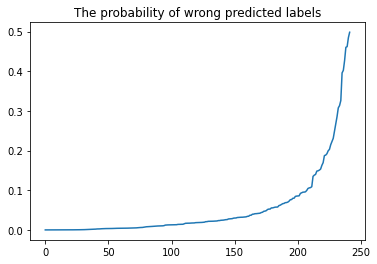

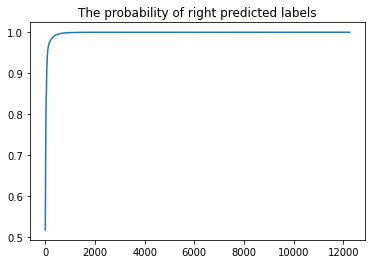

In [60]:
# see probabilities

wrong_probabilities = sorted([sent['probs'][sent['position']] for sent in wrong])
plt.title('The probability of wrong predicted labels')
plt.plot([x for x in range(len(wrong_probabilities))], wrong_probabilities)
plt.show()
plt.clf()

right_probabilities = sorted([sent['probs'][sent['position']] for sent in right])
plt.title('The probability of right predicted labels')
plt.plot([x for x in range(len(right_probabilities))], right_probabilities)

In [63]:
# most frequent adjectives

sorted_lemmas = sorted(Counter([x['adj_lemma'] for x in all_sents]).items(), key=lambda x: x[1], reverse=True)
most_freq = [x[0] for x in sorted_lemmas[:10]]
print(most_freq)

['tout', 'nouveau', 'premier', 'grand', 'public', 'français', 'européen', 'social', 'national', 'dernier']


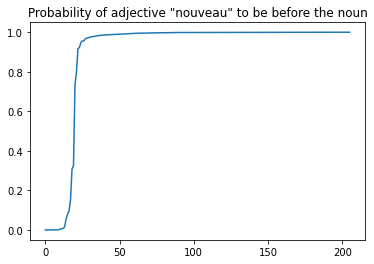


Predicted as after-noun, was before-noun : 
6 / 2655

Predicted as before-noun, was after-noun : 
9 / 9844


In [81]:
# plot the probs of most frequent adjectives
adj = 'nouveau'
to_plot = []
for sent in all_sents:
    if sent['adj_lemma'] == adj:
        to_plot.append(sent["probs"][0])
        
plt.title('Probability of adjective "' + adj + '" to be before the noun')
plt.plot(list(range(len(to_plot))), sorted(to_plot))
plt.show()

print('\nPredicted as after-noun, was before-noun : ')
print(len([1 for x in wrong if x['adj_lemma'] == adj and x['position'] == 0]), "/", \
      len([1 for x in all_sents if x['position'] == 0]))
print('\nPredicted as before-noun, was after-noun : ')
print(len([1 for x in wrong if x['adj_lemma'] == adj and x['position'] == 1]), "/", \
      len([1 for x in all_sents if x['position'] == 1]))

In [ ]:
# mostly before noun: tout, premier, grand, nouveau
# mostly after noun: public, français, européen, social, national
# both: dernier